In [1]:
import heapq
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import datasets

from knn import KNN

In [2]:
# load training set
iris = datasets.load_iris(return_X_y=True)
X = iris[0][:,:2]
y = iris[1]

# create test data
dim1 = np.linspace(min(X[:,0]),max(X[:,0]),100)
dim2 = np.linspace(min(X[:,1]),max(X[:,1]),100)
X_test_0, X_test_1 = np.meshgrid(dim1, dim2)
X_test = np.stack((X_test_0.reshape(-1),X_test_1.reshape(-1)),axis=1)

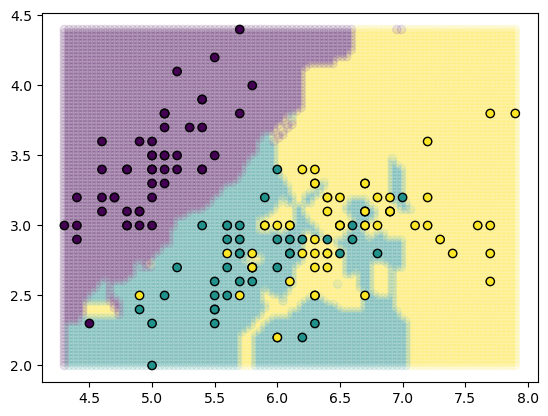

In [3]:
# initialize model
knn = KNN(n_neighbors=3, p=1, X_train=X, y_train=y)

# predict test data
y_pred = knn.predict(X_test)

# plot decision boundary
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,alpha=0.1)
plt.scatter(X[:,0],X[:,1],c=y, edgecolors='black')

/Users/gokberk/miniconda3/envs/ml4hc_project2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


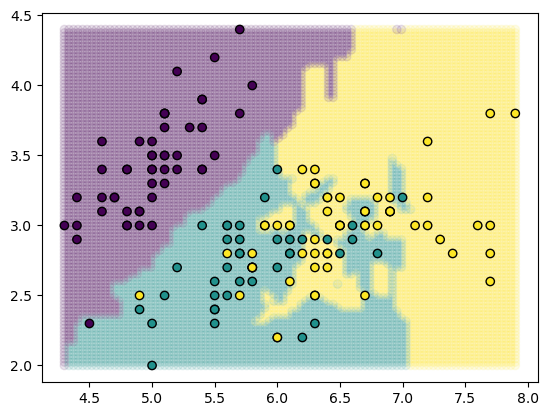

In [4]:
# validate your implementation against sklearn
model = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=1, weights='uniform')

model.fit(X, y)

y_sk_pred = model.predict(X_test)

# plot decision boundary
plt.scatter(X_test[:,0],X_test[:,1],c=y_sk_pred,alpha=0.1)
plt.scatter(X[:,0],X[:,1],c=y, edgecolors='black')

### K-Means algorithm

mean_center_diff: 0.8650827806214081.
mean_center_diff: 0.39868866647755613.
mean_center_diff: 0.12643477335205186.
mean_center_diff: 0.05985109502016892.
mean_center_diff: 0.01638757905423412.
mean_center_diff: 0.0.


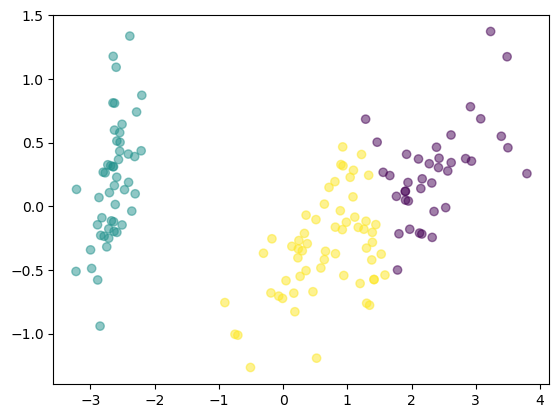

In [3]:
from kmeans import KM
from sklearn.decomposition import PCA

iris = datasets.load_iris(return_X_y=True)
X_ = iris[0]

X = PCA(n_components=2).fit_transform(X_)

model = KM(k = 3, tol = 1e-4)

model.fit(X)

y_pred = list(map(lambda x: x[1], model.X_y))

plt.scatter(X[:,0],X[:,1],c=y_pred,alpha=0.5)